# NBA Games Prediction
## Imports and Load Data

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [278]:
games = pd.read_csv("nba_games_2024.csv")
games.replace([np.inf, -np.inf], np.nan,inplace=True)
games.head()

,season,date,home_team,home_total,away_team,away_total,mp,home_fg,home_fga,home_fg%,...,away_drb%,away_trb%,away_ast%,away_stl%,away_blk%,away_tov%,away_usg%,away_ortg,away_drtg,home_won
0,2024,2023-10-24,GSW,104,PHO,108,240.0,36.0,101.0,0.356,...,70.5,55.0,54.8,4.9,12.1,15.6,100.0,106.2,102.3,False
1,2024,2023-10-24,LAL,107,DEN,119,240.0,41.0,90.0,0.456,...,71.7,48.8,60.4,9.4,9.8,10.3,100.0,124.8,112.3,False
2,2024,2023-10-24,DEN,119,LAL,107,240.0,48.0,91.0,0.527,...,77.5,51.2,56.1,5.2,7.0,10.0,100.0,112.3,124.8,True
3,2024,2023-10-24,PHO,108,GSW,104,240.0,42.0,95.0,0.442,...,64.6,45.0,52.8,10.8,9.7,8.8,100.0,102.3,106.2,True
4,2024,2023-10-25,ORL,116,HOU,86,240.0,42.0,87.0,0.483,...,58.5,35.2,59.4,6.4,5.7,17.3,100.0,91.8,123.8,True


## Exploratory Data Analysis

In [12]:
# Shape of dataframe
games.shape

(1464, 74)

<AxesSubplot:xlabel='home_total', ylabel='Count'>

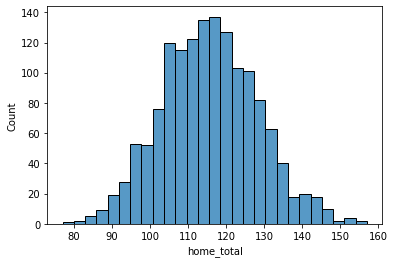

In [110]:
# Distribution of total points for home team
sns.histplot(data=games, x='home_total')

<AxesSubplot:xlabel='home_total', ylabel='away_total'>

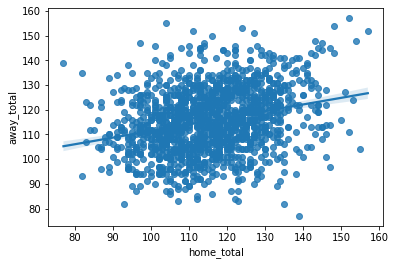

In [18]:
# Scatterplot of home and away points
sns.regplot(data=games, x='home_total',y='away_total')

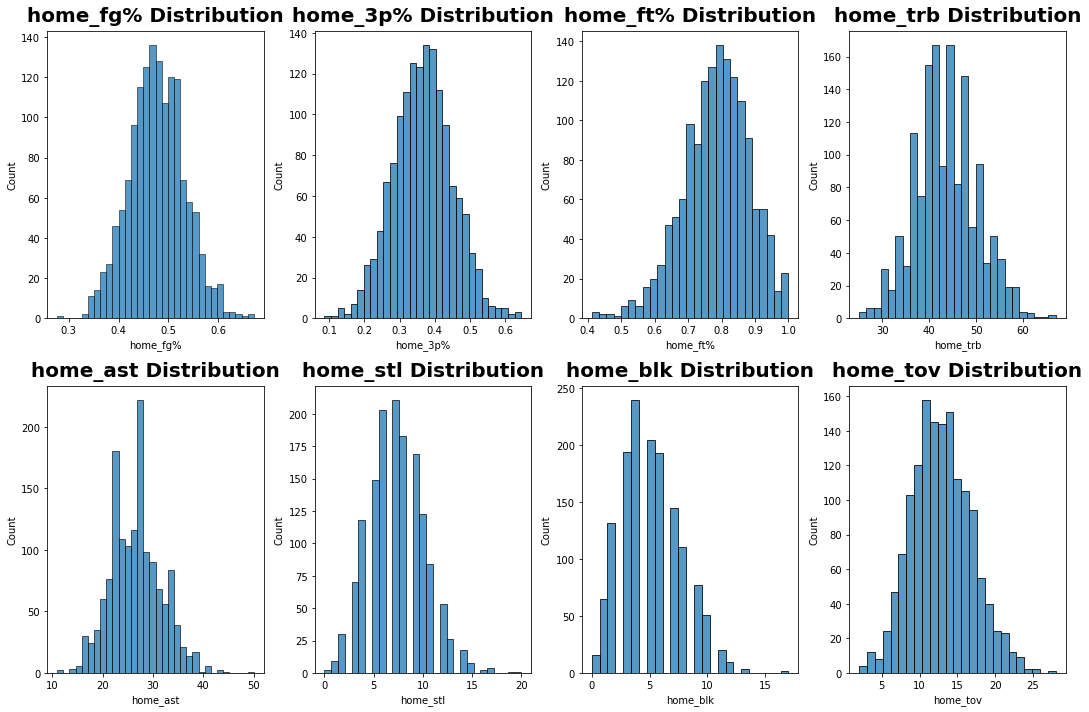

In [73]:
# Checking the distribution of basis games statistics
basic_stats = ['home_fg%','home_3p%','home_ft%','home_trb','home_ast','home_stl','home_blk','home_tov']

plt.figure(figsize=(15,10))
for index,column in enumerate(basic_stats):
    plt.subplot(2,4,index+1)
    sns.histplot(data=games, x=column)
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()


## EDA by Teams

In [109]:
# Checking stats by team
stats_by_team = games.groupby('home_team')[basic_stats].mean().reset_index()
stats_by_team['home_won'] = games[games['home_won']==True].groupby('home_team')['home_won'].count().reset_index()['home_won']
for col in stats_by_team.columns:
    replacement = col.replace('home_','')
    stats_by_team.rename(columns={col: replacement},inplace=True)
stats_by_team

,team,fg%,3p%,ft%,trb,ast,stl,blk,tov,won
0,ATL,0.466980,0.360449,0.812041,45.040816,25.938776,7.816327,4.387755,12.857143,22
1,BOS,0.477429,0.380776,0.804490,47.326531,25.795918,6.326531,6.612245,11.959184,37
2,BRK,0.463458,0.367563,0.763021,45.333333,26.750000,6.854167,5.375000,11.895833,20
3,CHI,0.466140,0.355320,0.789900,43.320000,24.460000,7.800000,5.140000,11.820000,23
4,CHO,0.459383,0.359702,0.791255,40.936170,24.914894,6.574468,4.978723,13.085106,10
5,CLE,0.479106,0.358149,0.779660,45.063830,26.765957,7.765957,4.574468,12.957447,31
6,DAL,0.475122,0.369918,0.758102,41.408163,25.285714,6.571429,4.265306,12.061224,26
7,DEN,0.495240,0.368720,0.748960,44.120000,28.780000,6.740000,5.380000,11.620000,34
8,DET,0.474750,0.357250,0.777729,43.250000,26.395833,5.937500,4.979167,14.979167,6
9,GSW,0.473565,0.375043,0.796891,46.086957,28.456522,6.586957,3.956522,13.956522,21


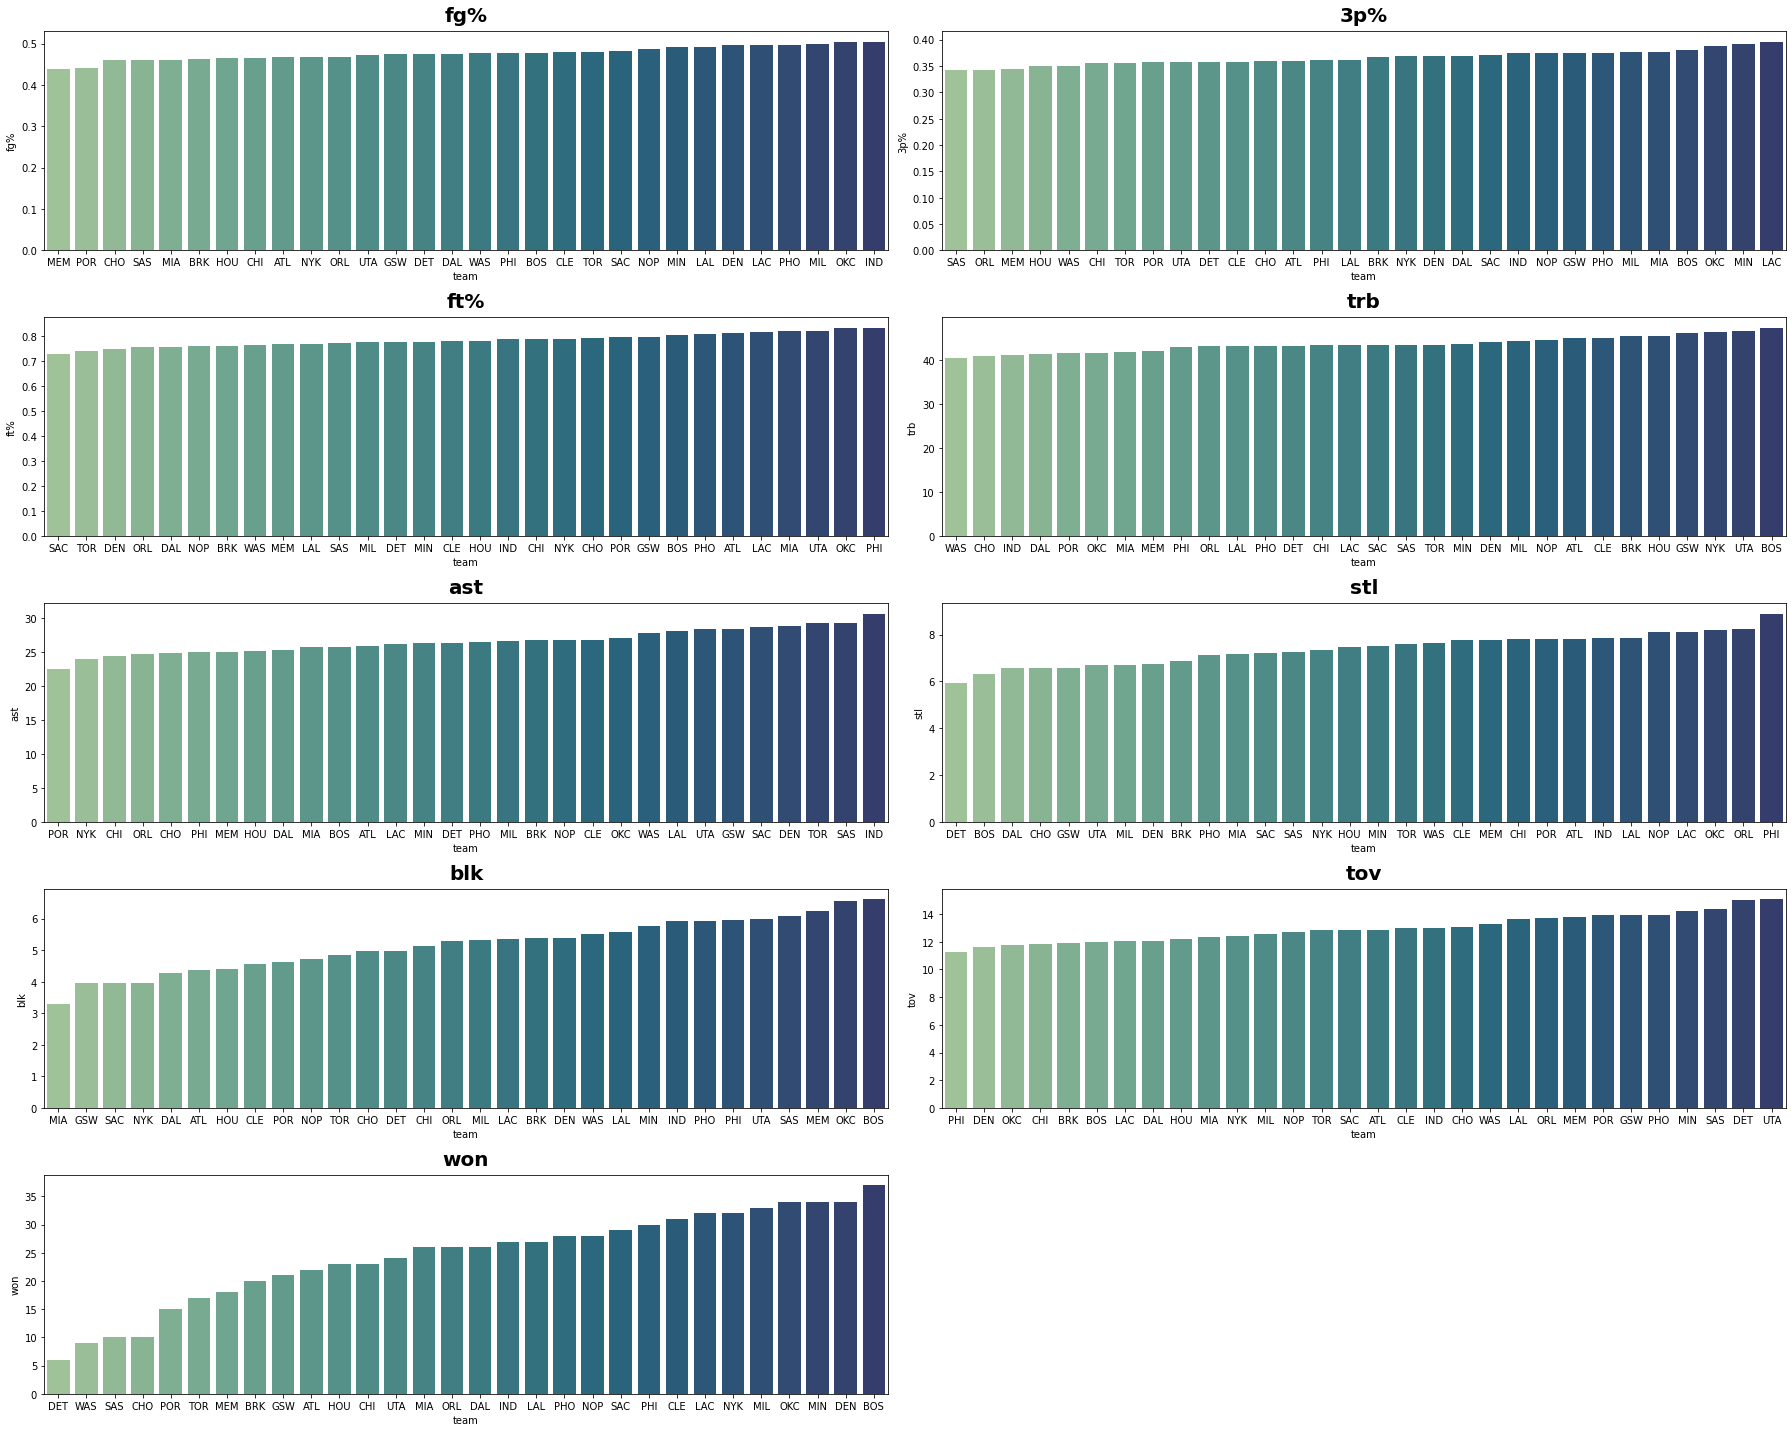

In [150]:
plt.figure(figsize=(25,20))
for index,column in enumerate(stats_by_team):
    if(index!=0): # index!=0 is not plotting the team stat
        plt.subplot(5,2,index)
        sns.barplot(stats_by_team,
                    x='team',
                    y=column,
                    order=stats_by_team.sort_values(column).team,
                    palette='crest')
        plt.title(f"{column}",fontweight="black",size=20,pad=10)
        plt.tight_layout()

In [223]:
################################################################################
### Creating dataframe that displays the top n teams in each basic statistic ###
################################################################################

from itertools import chain # to unlist nested lists

# Setting top n teams
n = 5

# Initializing lists
stat_index = []
team_index = []
values = []

# Appending lists
for col in stats_by_team.columns[1:]:
    stat_index.append([col]*n)
    team_index.append(list(stats_by_team.nlargest(n,'3p%')['team']))
    values.append(list(stats_by_team.nlargest(n,'3p%')['3p%']))

# Unlisting nested lists
stat_index = list(chain.from_iterable(stat_index))
team_index = list(chain.from_iterable(team_index))
values = list(chain.from_iterable(values))

# Creating dataframe
top_teams = pd.DataFrame([stat_index,team_index,values]).T
top_teams.columns = ['Stat','Team','Average']
top_teams.set_index(['Stat','Team'],inplace=True)
top_teams

Average
Stat Team          
fg%  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
3p%  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
ft%  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
trb  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
ast  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
stl  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
blk  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
tov  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837
won  LAC   0.395915
     MIN   0.392633
     OKC    0.38851
     BOS   0.380776
     MIA   0.376837

In [231]:
########################################################
### Custom Ranking of Teams based on all basic stats ###
########################################################

stats_by_team['overall'] = stats_by_team[['fg%','3p%','ft%','trb','ast','stl','blk','won']].sum(axis=1) - stats_by_team['tov']
team_overall = stats_by_team[['team','overall']].sort_values(by='overall',ascending=False).reset_index(drop=True)
team_overall.index += 1
team_overall

,team,overall
1,BOS,112.764735
2,DEN,109.012920
3,OKC,107.296531
4,MIL,105.100673
5,LAC,104.751681
6,MIN,104.600755
7,CLE,103.829681
8,PHI,103.193333
9,NYK,102.887320
10,IND,101.137431


## Data Cleaning

In [279]:
# Add target variable which is the result of the next game for the home team
def add_target(group):
    group["target"] = group["home_won"].shift(-1)
    return group

games = games.groupby("home_team", group_keys=False).apply(add_target)

In [280]:
# Changing the 'won' column from True/False to 1's and 0's
games['target'] = games['target']*1

# Separating the date column into 3 columns: year, month, day
games['date'] = pd.to_datetime(games['date'])

games['day'] = games['date'].dt.day
games['month'] = games['date'].dt.month
games['year'] = games['date'].dt.year
games = games.drop("date",axis=1)

# Creating dummy variables for categorical variables
games = pd.get_dummies(games, columns=['home_team', 'away_team'], drop_first=True)

In [283]:
# Dropping columns NaN values
games.drop(['home_+/-','away_+/-'],axis=1,inplace=True)

In [285]:
games.dropna(inplace=True)
games

,season,home_total,away_total,mp,home_fg,home_fga,home_fg%,home_3p,home_3pa,home_3p%,...,away_team_OKC,away_team_ORL,away_team_PHI,away_team_PHO,away_team_POR,away_team_SAC,away_team_SAS,away_team_TOR,away_team_UTA,away_team_WAS
0,2024,104,108,240.0,36.0,101.0,0.356,10.0,43.0,0.233,...,False,False,False,True,False,False,False,False,False,False
1,2024,107,119,240.0,41.0,90.0,0.456,10.0,29.0,0.345,...,False,False,False,False,False,False,False,False,False,False
2,2024,119,107,240.0,48.0,91.0,0.527,14.0,34.0,0.412,...,False,False,False,False,False,False,False,False,False,False
3,2024,108,104,240.0,42.0,95.0,0.442,11.0,33.0,0.333,...,False,False,False,False,False,False,False,False,False,False
4,2024,116,86,240.0,42.0,87.0,0.483,9.0,34.0,0.265,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2024,114,105,240.0,38.0,94.0,0.404,19.0,36.0,0.528,...,False,False,False,False,False,False,False,False,False,False
1432,2024,121,101,240.0,46.0,83.0,0.554,11.0,29.0,0.379,...,False,False,False,False,False,False,False,False,False,False
1434,2024,133,122,240.0,51.0,90.0,0.567,13.0,34.0,0.382,...,False,False,False,False,False,False,False,False,False,False
1438,2024,113,114,240.0,46.0,96.0,0.479,10.0,39.0,0.256,...,False,False,False,False,False,False,False,False,False,False


## Model Building

In [305]:
X = games.drop(['target'],axis=1)
y = games['target'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [306]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(accuracy_score(y_test,pred))

[[113 113]
 [ 77 128]]


              precision    recall  f1-score   support

           0       0.59      0.50      0.54       226
           1       0.53      0.62      0.57       205

    accuracy                           0.56       431
   macro avg       0.56      0.56      0.56       431
weighted avg       0.56      0.56      0.56       431



0.5591647331786543


In [304]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(accuracy_score(y_test,pred))

[[108 106]
 [ 76 141]]


              precision    recall  f1-score   support

           0       0.59      0.50      0.54       214
           1       0.57      0.65      0.61       217

    accuracy                           0.58       431
   macro avg       0.58      0.58      0.58       431
weighted avg       0.58      0.58      0.58       431



0.5777262180974478
